## Calculate molecule statistics 
Input : Molecule list converted from Insight3 format bin -> txt -> csv ( bin -> txt via Insight3 and txt -> csv via python) 
Output : Some graphs, and a csv file with mean and median of some property.   
### Fields in Insight3 molecule list :  
Cas###### : Category column. 1,2 are channels. 0 is non-specific. 9 is invalid.  
X : x coordinate (original)  
Y : y coordinate (original)  
Xc : Drift corrected x coordinate  
Yc : Drift corrected y coordinate    
Height : Height of a peak in ADU (?)  
Area : Area of the fitting ROI used for each emitter  
Width : Width of a peak in nm  
Phi : The azimuth angle of the elliptical gaussian fit  
Ax : The axial ratio of the elliptical gaussian used for fitting  
BG : Background of a detected peak  
i : Direct intensity ...   
Frame : Frame in which a molecule was first detected  
Length : Length of a track in frames  
Link : ...  
Valid : ...  
Z : z position  
Zc : Drift corrected z position    

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Change directory
os.chdir("/home/gayatri/storm-data/n_1")


In [4]:
mlist1 = 'n_1_corti.txt'
# mlist2 = 'cropped.csv'
# For a bin file converted to csv via matlab-storm
# df1 = pd.read_csv(mlist1, usecols= ['x', 'y', 'xc', 'yc', 'h', 'a', 'w', 'phi', 'ax', 'bg', 'i', 'c', 'density', 'frame', 'length', 'link', 'z', 'zc'])
# df2 = pd.read_csv(mlist2, usecols= ['x', 'y', 'xc', 'yc', 'h', 'a', 'w', 'phi', 'ax', 'bg', 'i', 'c', 'density', 'frame', 'length', 'link', 'z', 'zc'])
# For a text file molecule list output from Insight3
df = pd.read_csv(mlist1, sep='\t', usecols= ['Cas8213', 'X', 'Y', 'Xc', 'Yc', 'Height', 'Area', 'Width', 'Phi', 'Ax', 'BG', 'I', 'Frame', 'Length', 'Link', 'Valid', 'Z', 'Zc'])
# df = pd.read_csv(mlist1, sep='\t', usecols= ['c', 'x', 'y', 'xc', 'yc', 'h', 'z', 'w', 'phi', 'ax', 'bg', 'i', 'frame', 'length', 'link', 'valid', 'z', 'zc'])
file_name_1 = mlist1.rsplit('.txt',1)[0][:] # Edit this ! 
# file_name_2 = mlist2.rsplit('.csv',1)[0][:] # Edit this !

In [7]:
# df1[(df1['c']>=100) & (df1['frame']==1)].head()
df[df['Cas8213']>=100].head()

,Cas8213,X,Y,Xc,Yc,Height,Area,Width,Phi,Ax,BG,I,Frame,Length,Link,Valid,Z,Zc


In [29]:
print('Original :')
df1.iloc[[439,452,877,148,875,956,219,298]]

Original :


,x,y,xc,yc,h,a,w,phi,ax,bg,i,c,density,frame,length,link,z,zc
439,83.3541,104.7131,83.3541,104.7131,328.0513,3202.6528,393.1865,1.19390,1.31200,230.0112,18628.8027,0,1,72,1,-1,-261,262.8720
452,81.4286,104.0694,81.4286,104.0694,277.0941,2125.5798,360.3458,1.18420,1.10540,244.5669,3119.0781,1,1,74,1,-1,-155,331.5600
877,114.2540,154.6107,114.2540,154.6107,180.2284,5027.3462,378.3182,0.97434,1.28530,179.7647,5467.4683,2,1,142,3,-1,-233,281.0160
148,114.3975,154.5457,114.3975,154.5457,247.4187,5311.9189,315.4059,0.17837,1.05350,175.1315,5576.2349,2,1,22,4,-1,-70,386.6400
875,105.6614,112.4986,105.6614,112.4986,234.7405,4366.2148,340.9186,0.19723,0.68556,181.9908,4792.7407,2,1,142,3,-1,147,582.2928
956,105.4843,112.4044,105.4843,112.4044,242.7245,1572.2234,339.1667,0.17116,0.74743,165.6952,1639.6681,1,1,154,1,-1,120,554.6880
219,131.6504,157.4895,131.6504,157.4895,228.3908,9407.0273,379.7447,0.14928,1.52790,181.2291,9862.8477,1,1,34,5,-1,-276,253.1520
298,130.4833,157.7572,130.4833,157.7572,181.8537,1660.6443,404.8952,1.35050,1.33130,178.9548,1977.8489,0,1,48,1,-1,-282,249.2640


In [38]:
df1.iloc[[439,452,877,148,875,956,219,298]][['xc','yc','c','density','frame','zc']].to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &        xc &        yc &  c &  density &  frame &        zc \\\\\n\\midrule\n439 &   83.3541 &  104.7131 &  0 &        1 &     72 &  262.8720 \\\\\n452 &   81.4286 &  104.0694 &  1 &        1 &     74 &  331.5600 \\\\\n877 &  114.2540 &  154.6107 &  2 &        1 &    142 &  281.0160 \\\\\n148 &  114.3975 &  154.5457 &  2 &        1 &     22 &  386.6400 \\\\\n875 &  105.6614 &  112.4986 &  2 &        1 &    142 &  582.2928 \\\\\n956 &  105.4843 &  112.4044 &  1 &        1 &    154 &  554.6880 \\\\\n219 &  131.6504 &  157.4895 &  1 &        1 &     34 &  253.1520 \\\\\n298 &  130.4833 &  157.7572 &  0 &        1 &     48 &  249.2640 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [39]:
df2.iloc[[439,452,877,148,875,956,219,298]][['xc','yc','c','density','frame','zc']].to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &       xc &        yc &    c &  density &  frame &        zc \\\\\n\\midrule\n439 &  1.53830 & -1.037900 &  100 &       72 &      1 &  -12.3197 \\\\\n452 & -0.38722 & -1.681600 &  101 &       74 &      1 &   56.3683 \\\\\n877 &  1.86820 & -1.620900 &  102 &      142 &      2 &  108.0798 \\\\\n148 &  2.01170 & -1.685900 &  102 &       22 &      2 &  213.7038 \\\\\n875 &  1.31260 & -2.439600 &  102 &      142 &      3 &  456.1139 \\\\\n956 &  1.13540 & -2.533900 &  101 &      154 &      3 &  428.5091 \\\\\n219 &  0.85705 & -0.264860 &  101 &       34 &      4 &  -25.5969 \\\\\n298 & -0.31008 &  0.002776 &  100 &       48 &      4 &  -29.4849 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [30]:
print('Cropped :')
df2.iloc[[439,452,877,148,875,956,219,298]]

Cropped :


,x,y,xc,yc,h,a,w,phi,ax,bg,i,c,density,frame,length,link,z,zc
439,1.53830,-1.037900,1.53830,-1.037900,328.0513,3202.6528,393.1865,1.19390,1.31200,230.0112,18628.8027,100,72,1,1,-1,-12.3197,-12.3197
452,-0.38722,-1.681600,-0.38722,-1.681600,277.0941,2125.5798,360.3458,1.18420,1.10540,244.5669,3119.0781,101,74,1,1,-1,56.3683,56.3683
877,1.86820,-1.620900,1.86820,-1.620900,180.2284,5027.3462,378.3182,0.97434,1.28530,179.7647,5467.4683,102,142,2,3,-1,108.0798,108.0798
148,2.01170,-1.685900,2.01170,-1.685900,247.4187,5311.9189,315.4059,0.17837,1.05350,175.1315,5576.2349,102,22,2,4,-1,213.7038,213.7038
875,1.31260,-2.439600,1.31260,-2.439600,234.7405,4366.2148,340.9186,0.19723,0.68556,181.9908,4792.7407,102,142,3,3,-1,456.1139,456.1139
956,1.13540,-2.533900,1.13540,-2.533900,242.7245,1572.2234,339.1667,0.17116,0.74743,165.6952,1639.6681,101,154,3,1,-1,428.5091,428.5091
219,0.85705,-0.264860,0.85705,-0.264860,228.3908,9407.0273,379.7447,0.14928,1.52790,181.2291,9862.8477,101,34,4,5,-1,-25.5969,-25.5969
298,-0.31008,0.002776,-0.31008,0.002776,181.8537,1660.6443,404.8952,1.35050,1.33130,178.9548,1977.8489,100,48,4,1,-1,-29.4849,-29.4849


In [10]:
df['a'].apply(lambda x: x*0.058).describe()

count    434058.000000
mean        934.604053
std        1628.386377
min          13.238193
25%         252.599322
50%         483.017089
75%        1051.650873
max      141039.383000
Name: a, dtype: float64

In [295]:
# Assuming this movie has around 30000 frames and has 8 frames in one cycle.
# For first 2000 frames

# last_frame = 2000
# ch1 = numpy.arange(2,last_frame,8)
# ch2 = numpy.arange(6,last_frame,8)
# ns1_ch1 = numpy.arange(3,last_frame,8)
# ns2_ch1 = numpy.arange(4,last_frame,8)
# ns1_ch2 = numpy.arange(7,last_frame,8)
# ns2_ch2 = numpy.arange(8,last_frame,8)

# For middle 2000 frames

# last_frame = 17100
# ch1 = numpy.arange(14994,last_frame,8)
# ch2 = numpy.arange(14998,last_frame,8)
# ns1_ch1 = numpy.arange(14995,last_frame,8)
# ns2_ch1 = numpy.arange(14996,last_frame,8)
# ns1_ch2 = numpy.arange(14999,last_frame,8)
# ns2_ch2 = numpy.arange(15000,last_frame,8)

# For last 2000 frames

last_frame = 28100
ch1 = numpy.arange(26026,last_frame,8)
ch2 = numpy.arange(26030,last_frame,8)
ns1_ch1 = numpy.arange(26027,last_frame,8)
ns2_ch1 = numpy.arange(26028,last_frame,8)
ns1_ch2 = numpy.arange(26031,last_frame,8)
ns2_ch2 = numpy.arange(26032,last_frame,8)

In [275]:
print(ch1)

[    2    10    18 ... 14978 14986 14994]


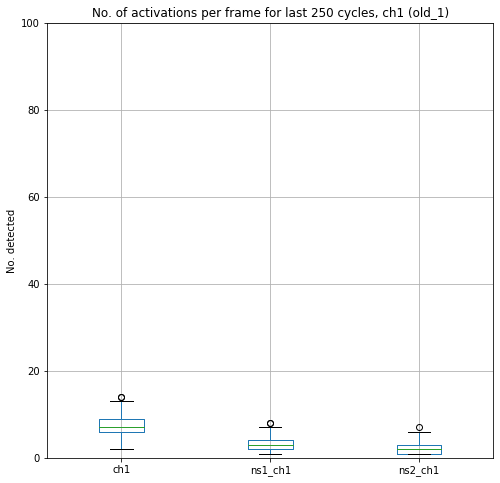

In [296]:
# Plot box chart showing number of activations per frame type. 

# The reindex function was a breakthrough!
s1 = pd.Series(numpy.ravel(c1.reindex(ch1).values), index=ch1, name='ch1')
s2 = pd.Series(numpy.ravel(c1.reindex(ns1_ch1).values), index=None, name='ns1_ch1')
s3 = pd.Series(numpy.ravel(c1.reindex(ns2_ch1).values), index=None, name='ns2_ch1')
s4 = pd.Series(numpy.ravel(c1.reindex(ch2).values), index=None, name='ch2')
s5 = pd.Series(numpy.ravel(c1.reindex(ns1_ch2).values), index=None, name='ns1_ch2')
s6 = pd.Series(numpy.ravel(c1.reindex(ns2_ch2).values), index=None, name='ns2_ch2')

df2 = pd.concat([s1, s2, s3, s4, s5, s6], axis=1)

plt.figure(figsize = (8,8))
boxplot1 = df2.boxplot(column=['ch1', 'ns1_ch1', 'ns2_ch1'])
plt.title('No. of activations per frame for last 250 cycles, ch1 ('+ file_name + ')')
plt.ylabel('No. detected')
plt.ylim([0, 100])
plt.savefig('img/act_per_frame/apf_'+ file_name + '_ch1_3')

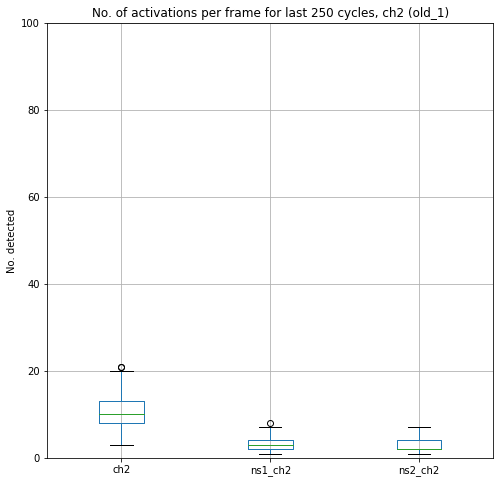

In [297]:
plt.figure(figsize = (8,8))
boxplot2 = df2.boxplot(column=['ch2', 'ns1_ch2', 'ns2_ch2'])
plt.title('No. of activations per frame for last 250 cycles, ch2 ('+ file_name + ')')
plt.ylabel('No. detected')
plt.ylim([0, 100])
plt.savefig('img/act_per_frame/apf_'+ file_name + '_ch2_3')

In [303]:
df[df['c']!=0|9]['h'].describe()

count    434058.000000
mean       1008.932239
std         579.923605
min         500.001500
25%         604.506450
50%         803.227750
75%        1214.904625
max       11067.837900
Name: h, dtype: float64

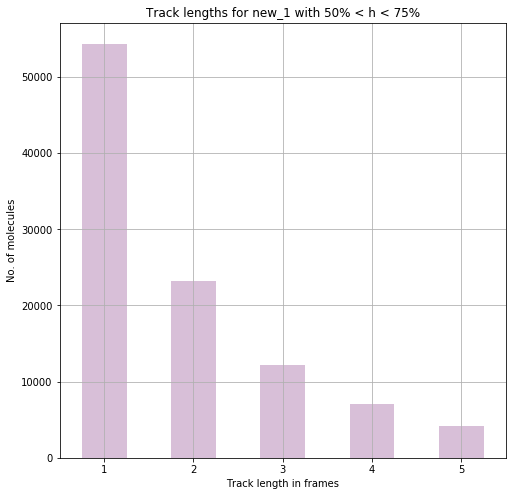

In [305]:
filtered_df = df[(df['h'].between(1214, 11067)) & (df['c']!=0|9)] # Edit here !
track_lengths = filtered_df['length'].value_counts()
plt.figure(figsize = (8,8))
track_lengths.sort_index().head().plot(kind="bar", grid=True, rot=0, color='thistle')
# plt.ylim([0, 250000])
plt.title('Track lengths for '+ file_name + ' with h > 75%')# Next here!
plt.ylabel('No. of molecules')
plt.xlabel('Track length in frames')
plt.savefig('img/track_lengths/tl_'+ file_name + '_h-3') # Next here!

In [12]:
# h_df = df[(df['length']==5) & (df['c']!=0|9)] # Edit here !
# h_max = h_df['h'].max()
# bins = numpy.arange(0, h_max+1000, 50)
# plt.figure(figsize = (8,8))
# d1 = plt.hist(h_df['h'], bins=bins, alpha=0.5, density= False, edgecolor='grey', linewidth=0.8, color='teal')
# plt.xlim([0, 4000])
# plt.ylim([0, 40000])
# plt.title('Histogram of Heights for '+ file_name +' (Track length = 5 only)')
# plt.ylabel('No. of molecules')
# plt.xlabel('Heights')
# plt.savefig('img/heights/h_hist_tl_5_'+file_name)

In [13]:
# plt.figure(figsize = (8,8))
# hw_df = df[df['c']!=0|9]
# d6 = plt.scatter(hw_df['i'], hw_df['a'], s=10, alpha=0.5, c='teal')
# plt.xlim([0, 40000])
# plt.ylim([0, 40000])
# plt.title('a vs i for ' + file_name)
# plt.ylabel('a')
# plt.xlabel('i')
# plt.savefig('a_vs_i_'+file_name)